# Q3
- convert to [R,G,B] feature space
- run k-means clustering wit k = 3 using random_start = 42
- Compute cluster fractions f0 , f1 , f2 at every iteration and print them
- Display the centroid masked image in every iteration
- Compute the final area of each clusteroids and print them in the last
- Print the RGB value of each centroids

Team Members: 1. Yuvaraj Nayak 2023A7PS0006U — Implemented Q1 and Q3     2. Abrar 2023A7PS0173U — Implemented Q2 and Q4
This question is done by Yuvaraj Nayak

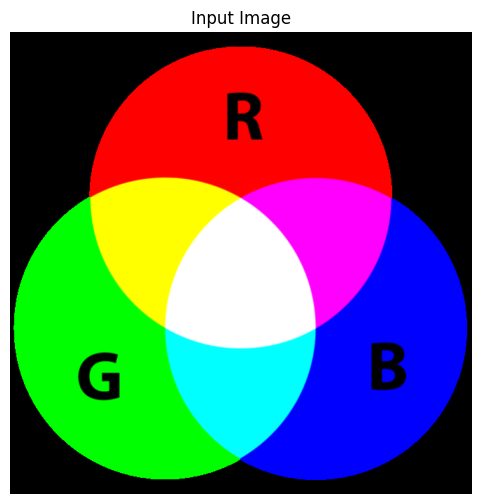

Running K-Means (k=3, seed=42)...

Iteration 0: f0=0.6696, f1=0.0000, f2=0.3304


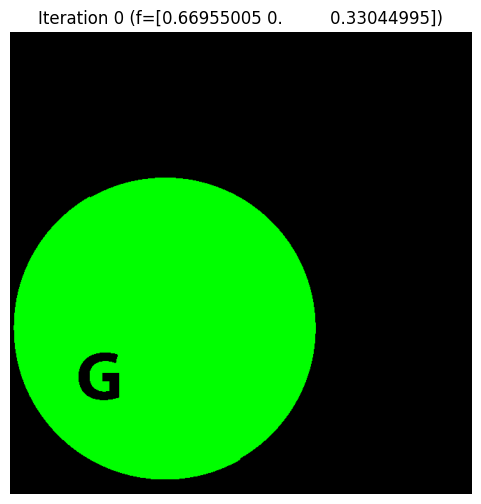

Iteration 1: f0=0.3451, f1=0.3246, f2=0.3304


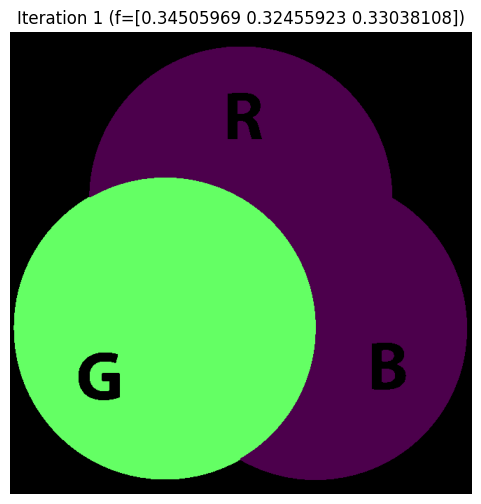

Iteration 2: f0=0.3445, f1=0.3254, f2=0.3301


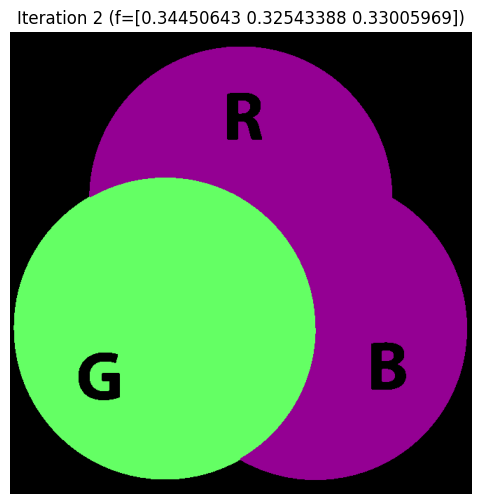

Iteration 3: f0=0.3445, f1=0.3254, f2=0.3301


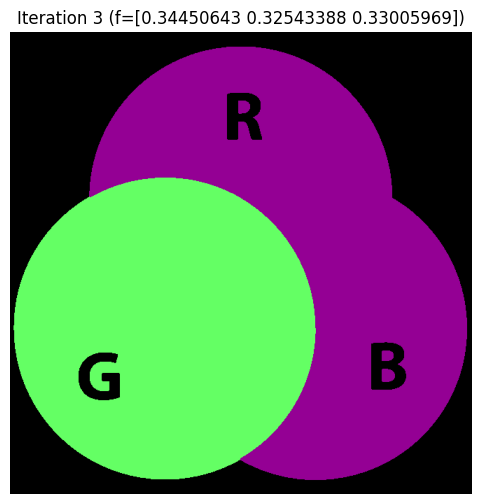


Converged at iteration 3.

--- Final Cluster Areas (Pixel Counts) ---
Cluster 0: 150067 pixels
Cluster 1: 141759 pixels
Cluster 2: 143774 pixels

--- Final Centroid RGB Values ---
Cluster 0: [148.30359     0.3666762 148.03116  ]
Cluster 1: [0.2324438  0.22859924 0.1834663 ]
Cluster 2: [100.512   255.23795 100.5309 ]


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def run_k_means():
    # Load image
    img_path = 'images/Q3.png'
    img = cv2.imread(img_path)

    if img is None:
        print(f"Error: Could not read image {img_path}")
        return

    # Convert to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Show original image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()
    
    # 1. Convert to [R,G,B] feature space
    pixels = img.reshape((-1, 3)).astype(np.float32)

    # 2. Run k-means clustering with k=3 using random_start=42
    k = 3
    seed = 42
    np.random.seed(seed)

    # Initialization
    n_samples = pixels.shape[0]
    random_indices = np.random.choice(n_samples, k, replace=False)
    centroids = pixels[random_indices]

    max_iters = 50
    tolerance = 1e-4
    
    # To store final counts
    final_counts = None

    print("Running K-Means (k=3, seed=42)...\n")
    for i in range(max_iters):
        # Calculate distances
        dists = np.zeros((n_samples, k))
        for c in range(k):
            dists[:, c] = np.linalg.norm(pixels - centroids[c], axis=1)
        
        # Assign clusters
        labels = np.argmin(dists, axis=1)
        
        # Compute fractions
        counts = np.bincount(labels, minlength=k)
        final_counts = counts
        fractions = counts / n_samples
        
        # Print fractions
        print(f"Iteration {i}: f0={fractions[0]:.4f}, f1={fractions[1]:.4f}, f2={fractions[2]:.4f}")
        
        # --- Visualization at every iteration ---
        segmented_img = centroids[labels].reshape(img.shape).astype(np.uint8)
        
        plt.figure(figsize=(6, 6))
        plt.imshow(segmented_img)
        plt.axis('off')
        plt.title(f"Iteration {i} (f={fractions})")
        plt.show()
        # --------------------------------------

        # Update centroids
        new_centroids = np.zeros_like(centroids)
        for c in range(k):
            if counts[c] > 0:
                new_centroids[c] = pixels[labels == c].mean(axis=0)
            else:
                new_centroids[c] = centroids[c]
                
        # Check convergence
        diff = np.linalg.norm(centroids - new_centroids)
        if diff < tolerance:
            print(f"\nConverged at iteration {i}.")
            break
            
        centroids = new_centroids
    
    # 4. Compute and print final area of each cluster
    print("\n--- Final Cluster Areas (Pixel Counts) ---")
    for c in range(k):
        area = final_counts[c]
        print(f"Cluster {c}: {area} pixels")
        
    # 5. Print RGB value of each centroid
    print("\n--- Final Centroid RGB Values ---")
    for c in range(k):
        rgb = centroids[c]
        print(f"Cluster {c}: {rgb}")

run_k_means()